In [1]:
from pathlib import Path
import requests
import shutil
import folium

In [2]:
import pandas as pd

In [3]:
from IPython.display import display

In [4]:
SCRIPT_DIR = Path('.').resolve()
INPUT_DIR = SCRIPT_DIR / 'input'
OUTPUT_DIR = SCRIPT_DIR / 'output'
OUTPUT_DIR.mkdir(exist_ok=True)

In [5]:
INPUT_FILE = INPUT_DIR / 'wuerzburg_trees.parquet'
INPUT_URL = "https://opendata.wuerzburg.de/api/explore/v2.1/catalog/datasets/sls-klimabaeume/exports/parquet?lang=en&timezone=Europe%2FBerlin"
USER_AGENT = {'User-agent': 'Mozilla/5.0'}

In [6]:
def download_file(download_url, download_path):
    with requests.get(download_url, stream=True, headers=USER_AGENT) as r:
        with open(download_path, 'wb') as f:
            shutil.copyfileobj(r.raw, f)


if INPUT_FILE.exists() and INPUT_FILE.stat().st_size > 0:
    print(f"{INPUT_FILE} already here.")
else:
    print(f"Downloading {INPUT_URL}")
    download_file(INPUT_URL, INPUT_FILE)
    print("  Done")

df = pd.read_parquet(INPUT_FILE, engine='fastparquet')

C:\Users\eric.duminil\git\circulargreensimcity\python_scripts\parse_wurzburg_open_data\input\wuerzburg_trees.parquet already here.


In [7]:
df = pd.read_parquet('input/wuerzburg_trees.parquet', engine='fastparquet')

In [8]:
df

tree_number                  species_latin    species_german  \
0                      23631       Tilia Cordata Greenspire       Stadt-Linde   
1                     5463.1              Ulmus New Horizon  Ulme New Horizon   
2                      58413              Ulmus New Horizon  Ulme New Horizon   
3                      58753               Acer Platanoides       Spitz-Ahorn   
4                       5540       Tilia Cordata Greenspire       Stadt-Linde   
...                      ...                            ...               ...   
158720    05_Ersatz_3_7023.2                      Unbekannt         Unbekannt   
158721                5463.1              Ulmus New Horizon  Ulme New Horizon   
158722    05_Ersatz_3_7023.2                      Unbekannt         Unbekannt   
158723  Gartenamt_Kontroll_2                      Unbekannt         Unbekannt   
158724                 65851  Fraxinus Angustifolia Raywood     Esche Raywood   

         latitude  longitude         soil_composition  vol_water_content_30  \
0       49.793440   9.940730           Boden Ringpark                  37.0   
1       49.796000   9.932720  Eigensubstrat Gartenamt                  45.0   
2       49.796580   9.941690        Boden-Sand-Lehm 4                  22.0   
3       49.782000   9.956770                VulkaTree                  44.0   
4       49.793180   9.933190        Boden-Sand-Lehm 4                  35.0   
...           ...        ...                      ...                   ...   
158720  49.791642   9.935594                VulkaTree                  59.0   
158721  49.796000   9.932720  Eigensubstrat Gartenamt                  36.0   
158722  49.791642   9.935594                VulkaTree                  59.0   
158723  49.797012  10.001281  Eigensubstrat Gartenamt                   0.0   
158724  49.791200   9.927240                VulkaTree                  49.0   

        vol_water_content_100  permittivity_30  permittivity_100  \
0                        27.0            22.34             15.17   
1                        33.0            30.84             18.86   
2                        34.0            11.81             20.14   
3                        31.0            30.32             17.33   
4                        36.0            20.65             21.61   
...                       ...              ...               ...   
158720                    NaN            53.11               NaN   
158721                   33.0            22.05             19.29   
158722                    NaN            53.06               NaN   
158723                    NaN             0.00               NaN   
158724                   37.0            37.43             22.84   

        conductivity_30  conductivity_100  usable_field_capacity_30  \
0                  19.3              21.8                117.647059   
1                  20.9               0.0                176.190476   
2                   0.0              19.1                 55.555556   
3                   0.0               0.0                139.130435   
4                  19.2               0.0                127.777778   
...                 ...               ...                       ...   
158720             38.1               NaN                137.837838   
158721             19.5               0.0                 90.322581   
158722             38.2               NaN                137.837838   
158723              0.0               NaN                -25.806452   
158724              0.0              19.8                110.810811   

        usable_field_capacity_100  temperature_30  temperature_100  \
0                       58.823529           25.06            23.19   
1                      119.047619           25.26            25.12   
2                      122.222222           26.51            24.40   
3                       82.608696           24.94            19.20   
4                      133.333333           23.13            19.85   
...  

In [9]:
interesting_columns = ['tree_number', 'species_latin', 'latitude', 'longitude']

In [10]:
species = 'species_latin'
coordinates = ['latitude', 'longitude']
df[interesting_columns].drop_duplicates().groupby(species).apply(display)

tree_number     species_latin   latitude  longitude
3                   58753  Acer Platanoides  49.782000   9.956770
425    06_Ersatz_01_58753  Acer Platanoides  49.781994   9.959306
10702  06_Ersatz_01_58753  Acer Platanoides  49.781994   9.959306

tree_number                  species_latin  latitude  longitude
7       65851  Fraxinus Angustifolia Raywood   49.7912    9.92724

tree_number   species_latin  latitude  longitude
28816       54838  Fraxinus Ornus  49.77794    9.93879

tree_number                  species_latin  latitude  longitude
11925      8971.1  Gleditsia Triacanthos Inermis  49.79037    9.92953

tree_number         species_latin  latitude  longitude
9       36312  Robinia Pseudoacacia   49.7913    9.96101

tree_number     species_latin  latitude  longitude
5       54976  Sophora Japonica  49.78955    9.93318

tree_number             species_latin  latitude  longitude
0       23631  Tilia Cordata Greenspire  49.79344    9.94073
4        5540  Tilia Cordata Greenspire  49.79318    9.93319

tree_number            species_latin  latitude  longitude
30                 58762  Tilia Tomentosa Brabant  49.78558   9.959380
424    01_Ersatz_2_58762  Tilia Tomentosa Brabant  49.78550   9.959306
10455  01_Ersatz_2_58762  Tilia Tomentosa Brabant  49.78550   9.959306

tree_number           species_latin  latitude  longitude
8           5445  Tilia Vulgaris Pallida  49.79619    9.93103
9075       42374  Tilia Vulgaris Pallida  49.79761    9.93270

tree_number      species_latin  latitude  longitude
1      5463.1  Ulmus New Horizon  49.79600    9.93272
2       58413  Ulmus New Horizon  49.79658    9.94169

tree_number species_latin  latitude  longitude
11914       56822  Ulmus Rebona  49.78703    9.92758

tree_number species_latin   latitude  longitude
10                   7023.2     Unbekannt  49.791660   9.935570
430      05_Ersatz_3_7023.2     Unbekannt  49.791642   9.935594
10459    05_Ersatz_3_7023.2     Unbekannt  49.791642   9.935594
10464  Gartenamt_Kontroll_2     Unbekannt  49.797012  10.001281
10465  Gartenamt_Kontroll_1     Unbekannt  49.796866  10.001541
11431  Gartenamt_Kontroll_2     Unbekannt  49.797012  10.001281
11446  Gartenamt_Kontroll_1     Unbekannt  49.796866  10.001541

Empty DataFrame
Columns: []
Index: []

In [11]:
lat_min, lon_min, lat_max, lon_max = df[coordinates].agg(['min', 'max']).stack().values

In [12]:
df[interesting_columns].drop_duplicates().groupby('tree_number').apply(display)

tree_number            species_latin  latitude  longitude
424    01_Ersatz_2_58762  Tilia Tomentosa Brabant   49.7855   9.959306
10455  01_Ersatz_2_58762  Tilia Tomentosa Brabant   49.7855   9.959306

tree_number species_latin   latitude  longitude
430    05_Ersatz_3_7023.2     Unbekannt  49.791642   9.935594
10459  05_Ersatz_3_7023.2     Unbekannt  49.791642   9.935594

tree_number     species_latin   latitude  longitude
425    06_Ersatz_01_58753  Acer Platanoides  49.781994   9.959306
10702  06_Ersatz_01_58753  Acer Platanoides  49.781994   9.959306

tree_number             species_latin  latitude  longitude
0       23631  Tilia Cordata Greenspire  49.79344    9.94073

tree_number         species_latin  latitude  longitude
9       36312  Robinia Pseudoacacia   49.7913    9.96101

tree_number           species_latin  latitude  longitude
9075       42374  Tilia Vulgaris Pallida  49.79761     9.9327

tree_number           species_latin  latitude  longitude
8        5445  Tilia Vulgaris Pallida  49.79619    9.93103

tree_number      species_latin  latitude  longitude
1      5463.1  Ulmus New Horizon    49.796    9.93272

tree_number   species_latin  latitude  longitude
28816       54838  Fraxinus Ornus  49.77794    9.93879

tree_number     species_latin  latitude  longitude
5       54976  Sophora Japonica  49.78955    9.93318

tree_number             species_latin  latitude  longitude
4        5540  Tilia Cordata Greenspire  49.79318    9.93319

tree_number species_latin  latitude  longitude
11914       56822  Ulmus Rebona  49.78703    9.92758

tree_number      species_latin  latitude  longitude
2       58413  Ulmus New Horizon  49.79658    9.94169

tree_number     species_latin  latitude  longitude
3       58753  Acer Platanoides    49.782    9.95677

tree_number            species_latin  latitude  longitude
30       58762  Tilia Tomentosa Brabant  49.78558    9.95938

tree_number                  species_latin  latitude  longitude
7       65851  Fraxinus Angustifolia Raywood   49.7912    9.92724

tree_number species_latin  latitude  longitude
10      7023.2     Unbekannt  49.79166    9.93557

tree_number                  species_latin  latitude  longitude
11925      8971.1  Gleditsia Triacanthos Inermis  49.79037    9.92953

tree_number species_latin   latitude  longitude
10465  Gartenamt_Kontroll_1     Unbekannt  49.796866  10.001541
11446  Gartenamt_Kontroll_1     Unbekannt  49.796866  10.001541

tree_number species_latin   latitude  longitude
10464  Gartenamt_Kontroll_2     Unbekannt  49.797012  10.001281
11431  Gartenamt_Kontroll_2     Unbekannt  49.797012  10.001281

Empty DataFrame
Columns: []
Index: []

In [15]:
interactive_map = folium.Map()
interactive_map.fit_bounds([(lat_min, lon_min), (lat_max, lon_max)])

for same, grouped_df in df.groupby('tree_number'):
    tree = grouped_df.iloc[0]
    table = grouped_df.drop(coordinates, axis=1).describe().to_html()
    tree_id = tree['tree_number']
    lat = tree['latitude']
    lon = tree['longitude']
    species = tree['species_latin']
    species_de = tree['species_german']
    soil = tree['soil_composition']
    times = grouped_df['timestamp'].agg(['min', 'max'])
    folium.Circle(
        location=[lat, lon],
        tooltip=f"{species} ({species_de})",
        radius=50,  # [m]
        color="black",
        weight=1,
        fill_opacity=0.9,
        opacity=1,
        fill_color="green",
        fill=False,  # gets overridden by fill_color
        popup=f"Tree #{tree_id}, {species} ({species_de}).<br/>"
              f"{lat}°N {lon}°E, in {soil}<br/>"
              f"From {times['min']} to {times['max']}\n{table}",

    ).add_to(interactive_map)

output_map = OUTPUT_DIR / INPUT_FILE.with_suffix('.html').name
interactive_map.save(output_map)

print(f"{output_map} has been written.")
interactive_map

C:\Users\eric.duminil\git\circulargreensimcity\python_scripts\parse_wurzburg_open_data\output\wuerzburg_trees.html has been written.


<Axes: xlabel='timestamp'>

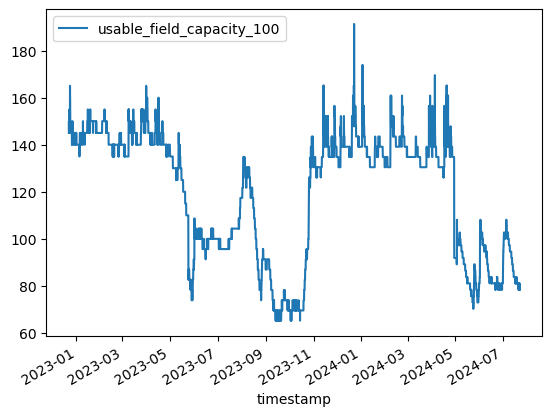

In [14]:
df[df['tree_number'] == '65851'][['timestamp', 'usable_field_capacity_100']].plot(x='timestamp', y='usable_field_capacity_100')